---
authors: Freek Pols
updated: december 3, 2025
---
# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


Soortelijke warmte van het onbekende materiaal: c_m = 186.55 ± 63.11 kJ/(kg·K)


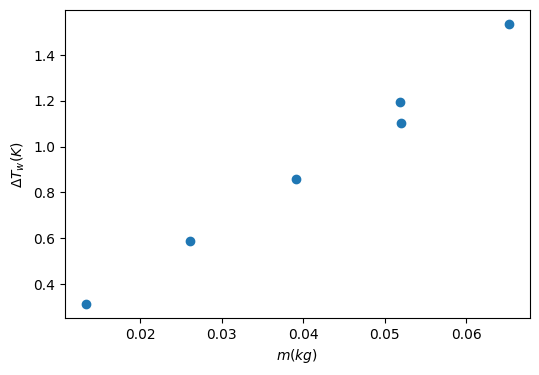

In [27]:
# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)
# waarbij naam vervangen wordt door de bestandsnaam. 
# Onderstaande voorbeeld code en output grafiek 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Inladen van de data

data = np.loadtxt(r"C:\Users\simon\Downloads\TU Delft\Bsc1 TN\Q2\IP2\Labs\Soortelijke warmte onbekend materiaal.csv", skiprows=1, delimiter=';')

m_m = data[:,0]
T_e = data[:,1]
T_mb = data[:,2]
T_wb = data[:,3]
m_w = data[:,4]
c_w = data[:,5]

def T_end(vars, c_m):
    c_w, m_w, m_m, T_wb, T_mb = vars
    T_e_calc = (c_w*m_w*T_wb + c_m*m_m*T_mb) / (c_w*m_w + c_m*m_m)
    return T_e_calc 

values, covariance = curve_fit(T_end, (c_w, m_w, m_m, T_wb, T_mb), T_e, p0=[500])
c_m = values[0]
c_m_err = np.sqrt(np.diag(covariance))[0]
T_e_fit = T_end((c_w, m_w, m_m, T_wb, T_mb), c_m)
print(f"Soortelijke warmte van het onbekende materiaal: c_m = {c_m:.2f} ± {c_m_err:.2f} kJ/(kg·K)")
plt.figure(figsize=(6,4))
plt.plot(m_m, T_e_fit - T_wb, 'o', label='Gemeten data')
plt.xlabel('$m(kg)$')
plt.ylabel('$ΔT_w(K)$')
plt.show()


```{figure} figures/naam.png
:width: 50%
:label: fig_naam 

Hier is het onderschrift van de figuur.
```

# Discussie en conclusie

Het doel van het onderzoek was om een onbekend materiaal te identificeren aan de hand van de warmtecapiciteit van het materiaal. Door cilinders van het materiaal met verschillende massa's te verwarmen, deze in water te plaatsen met een bekende begintemperatuur en dan de eindtemperatuur van het water te meten is data opgehaald. Met deze data is vasgesteld dat de warmtecapaciteit van het onbekende materiaal 186.55 ± 63.11 kJ/(kg·K) is. Hieruit valt te concluderen dat het gebruikte materiaal waarschijnlijk tin is, dit heeft een warmtecapaciteit van 227 kJ/(kg*K), dit valt binnen de onzekerheid en is aannemelijker dan andere materialen die dichterbij de gevonden waarde zijn (e.g. Antimoon, Beryllium).

Om dit onderzoek verder te verbeteren zou in het vervolg na elke meting het water weer terug kunnen worden gebracht naar dezelfde begintemperatuur, dit zorgt voor een constante T_bw, betrouwbaardere data en een kleinere onzekerheid. Verdere aanbevelingen zijn om andere aspecten van het onbekende materiaal te onderzoeken zoals de dichtheid om het materiaal met meer zekerheid vast te stellen.